In [2]:
import numpy as np
from pathlib import Path
from keras.preprocessing import image

#EXTRACTING TH DESIRED FOLDERS USING PATHLIB LIBRARY

In [12]:
p=Path('../downloads/images')

In [13]:
dirs=p.glob("*")
for folder_path in dirs:
    print(folder_path)

..\downloads\images\cats
..\downloads\images\dogs
..\downloads\images\horses
..\downloads\images\humans


#ITERATING THROUGH THE DIRECTOR AND STORING IMAGES IN A LIST USING KERAS!

In [17]:
labels_dic={"cat":0,"dog":1,"horse":2,"human":3}
dirs=p.glob("*")
image_data=[]
labels=[]
for folder_path in dirs:
    label=str(folder_path).split("\\")[-1][:-1]
    for img_path in folder_path.glob("*.jpg"):
        img=image.load_img(img_path,target_size=(32,32))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dic[label])
        
        
        

In [15]:
len(image_data)

808

In [16]:
len(labels)

808

In [68]:
image_data=np.array(image_data,dtype='float32')/300
labels=np.array(labels)

In [69]:
image_data.shape,labels.shape

((808, 32, 32, 3), (808,))

 #VISUALIZING THE DATA

In [63]:
import matplotlib.pyplot as plt

In [64]:
def draw(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()

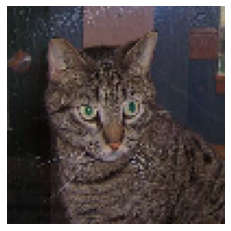

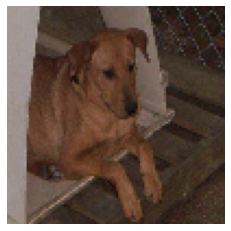

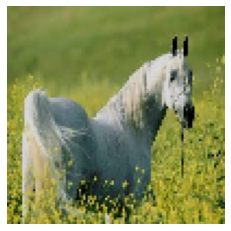

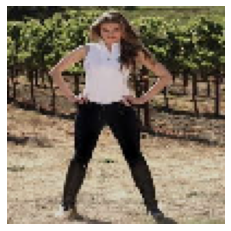

In [65]:
for i in [0,204,605,800]:    
    draw(image_data[i])

In [70]:
#RANDOM SHUFFLING THE DATA
import random
combined=list(zip(image_data,labels))
random.shuffle(combined)
#unzipping
image_data[:],labels[:]=zip(*combined)

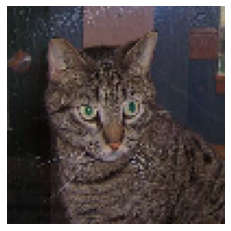

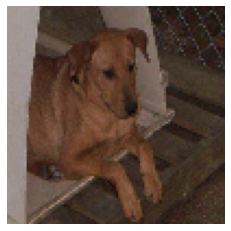

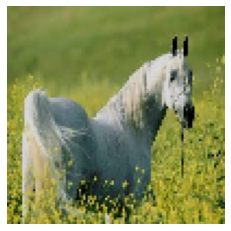

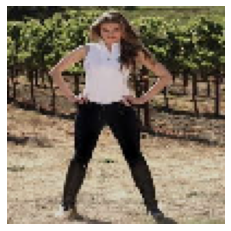

In [66]:
for i in [0,204,605,800]:    
    draw(image_data[i])

#WE CAN SEE THAT DATA IS NOT RANDOMLY SHUFFLED 

#FLATTENING THE IMAGES BY RESHAPING IT SO AS TO GET THE FEATURES IN A SINGLE ROW

In [71]:
m=image_data.shape[0]
image_data=image_data.reshape(m,-1)
image_data.shape,labels.shape

((808, 3072), (808,))

In [72]:
from sklearn import svm
svc=svm.SVC(kernel='linear',C=1)
model=svc.fit(image_data,labels)

In [73]:
model.score(image_data,labels)*100

67.07920792079209

#TUNING THE HYPERPARAMETERS TO GET A HIGHER ACCURACY USING GRIDSEARCHCV

In [74]:
params = [
  {'C': [0.1,0.2,0.5,1.0,2.0,5.0], 
   'kernel': ['linear','rbf','poly','sigmoid']
  }

 ]

In [75]:
import multiprocessing
cpus = multiprocessing.cpu_count()
print(cpus)

8


In [76]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=svm.SVC(),param_grid=params,scoring="accuracy",cv=5,n_jobs = cpus)
gs.fit(image_data,labels)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=8,
             param_grid=[{'C': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             scoring='accuracy')

In [77]:
gs.best_estimator_

SVC(C=0.5)

In [78]:
gs.best_score_

0.39963193006671266